In [1]:
pip install pytorch-lightning


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 585 kB 35.7 MB/s 
     |████████████████████████████████| 596 kB 19.6 MB/s 
     |████████████████████████████████| 140 kB 52.1 MB/s 
     |████████████████████████████████| 419 kB 58.8 MB/s 
     |████████████████████████████████| 1.1 MB 48.7 MB/s 
     |████████████████████████████████| 144 kB 67.2 MB/s 
     |████████████████████████████████| 271 kB 72.6 MB/s 
     |████████████████████████████████| 94 kB 3.8 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
import os
from collections import OrderedDict

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from pytorch_lightning import LightningDataModule, LightningModule, Trainer
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import MNIST

In [3]:
class MNISTModel(LightningModule):
    def __init__(self):
        super().__init__()
        self.l1 = torch.nn.Linear(28 * 28, 10)

    def forward(self, x):
        return torch.relu(self.l1(x.view(x.size(0), -1)))

    def training_step(self, batch, batch_nb):
        x, y = batch
        loss = F.cross_entropy(self(x), y)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.02)

In [4]:
PATH_DATASETS = os.environ.get("PATH_DATASETS", ".")
AVAIL_GPUS = min(1, torch.cuda.device_count())
BATCH_SIZE = 256 if AVAIL_GPUS else 64

In [6]:
mnist_model = MNISTModel()

# Init DataLoader from MNIST Dataset
train_ds = MNIST(PATH_DATASETS, train=True, download=True, transform=transforms.ToTensor())
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE)

# Initialize a trainer
trainer = Trainer(
    gpus=AVAIL_GPUS,
    max_epochs=20,
    progress_bar_refresh_rate=20,
)

# Train the model ⚡
trainer.fit(mnist_model, train_loader)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/callback_connector.py:97: LightningDeprecationWarning: Setting `Trainer(progress_bar_refresh_rate=20)` is deprecated in v1.5 and will be removed in v1.7. Please pass `pytorch_lightning.callbacks.progress.TQDMProgressBar` with `refresh_rate` directly to the Trainer's `callbacks` argument instead. Or, to disable the progress bar pass `enable_progress_bar = False` to the Trainer.
  f"Setting `Trainer(progress_bar_refresh_rate={progress_bar_refresh_rate})` is deprecated in v1.5 and"
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name | Type   | Params
--------------------------------
0 | l1   | Linear | 7.9 K 
--------------------------------
7.9 K     Trainable params
0         Non-trainable params
7.9 K     Total params
0.031     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

In [7]:
data, labels = next(iter(train_loader))
data.shape,labels.shape

(torch.Size([256, 1, 28, 28]), torch.Size([256]))

In [8]:
logits = mnist_model(data)
logits.shape

torch.Size([256, 10])

In [9]:
ps= F.softmax(logits,dim=1)

In [10]:
ps.shape

torch.Size([256, 10])

In [11]:
top_p, top_class = ps.topk(1,dim=1)

In [12]:
transform = transforms.Compose([transforms.ToPILImage(),
                                transforms.Resize(256)])

In [13]:
import matplotlib.pyplot as plt


In [15]:
img = []
for i in range(5):
  img.append(transform(data[i]))

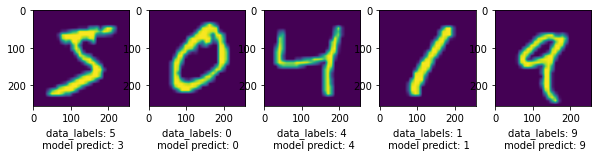

In [16]:
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(figsize=(10,6), ncols=5)
ax1.imshow(img[0])
ax1.set_xlabel(f"data_labels: {labels[0].item()}\n model predict: {top_class[0].item()}")
ax2.imshow(img[1])
ax2.set_xlabel(f"data_labels: {labels[1].item()}\n model predict: {top_class[1].item()}")
ax3.imshow(img[2])
ax3.set_xlabel(f"data_labels: {labels[2].item()}\n model predict: {top_class[2].item()}")
ax4.imshow(img[3])
ax4.set_xlabel(f"data_labels: {labels[3].item()}\n model predict: {top_class[3].item()}")
ax5.imshow(img[4])
ax5.set_xlabel(f"data_labels: {labels[4].item()}\n model predict: {top_class[4].item()}")

plt.show()


In [ ]:
#4는 틀렸나보다. 